<img src="https://minas.medellin.unal.edu.co/eventos/latwaves2018/images/logo_unal.png" alt="unal logo" width="400"/>

# Data Collection, Cleansing And Exploratory Data Analysis
## Introduction to Data Science and Visualization 2022-1
### By 
- Rafael Mauricio Ruiz Nino ramruizni@unal.edu.co
- Jheison Alejandro Morales Vásquez jhmoralesva@unal.edu.co

The goal of this assignment focuses on collecting the data set for your project report, perform data cleansing and some exploratory data analysis. 

## 1. Data Set Organization

You will need to describe the data model for your data set. And you will need to perform a database implementation, using suitable software tools.

For this project we are looking to use two datasets:

1. The BIFI dataset
2. The MBPP dataset

### Description BIFI Dataset

This section will describe the structure of the BIFI data, in the next picture we can see a very basic data model:

![nosql data model](../2_database_design_impl/assets/exercise_db_design_impl-nosql_data_model.drawio.png)
For more info you can visit [Exercise Database](../2_database_design_impl/README.md)

The original data can be found here: https://github.com/michiyasunaga/BIFI

> Note: Only the minimal version is used for this data exploration exercise.

### Description MBPP Dataset

TODO


## Data Cleansing

A description of the cleansing process of your data set. Particularly, you should mention the tasks you used to remove unwanted observations such as duplicate observations and irrelevant observations; to fix structural errors, which may arise during measurement, data transfer, or other types of "poor housekeeping", for instance, you can check for typos or inconsistent capitalization; to filter unwanted outliers, and to handle missing data. 

### BIFI Dataset

In [2]:
# To replicate this EDA excercise you can download the data:
#!wget https://nlp.stanford.edu/projects/myasu/BIFI/data_minimal.zip
#!unzip data_minimal.zip
# path_bifi = './bifi_data_minimal/data'

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [4]:
# If you download manually the data and uncompress it, please define the path of the data
path_bifi = '/mnt/c/ws/proposal/bifi_data_minimal/data' #for windows 11, running local with WSL 2

dir_list = os.listdir(path_bifi)
 
print("Files and directories")
dir_list

Files and directories


['orig_bad_code', 'orig_good_code', 'token_vocab.txt']

In [5]:
os.listdir(f"{path_bifi}/orig_bad_code")

['orig.0.bad',
 'orig.0.id',
 'orig.1.bad',
 'orig.1.id',
 'orig.2.bad',
 'orig.2.id',
 'orig.3.bad',
 'orig.3.id',
 'orig.4.bad',
 'orig.4.id',
 'orig.bad.json']

In [6]:
bad_code_df = pd.read_json(f"{path_bifi}/orig_bad_code/orig.bad.json", orient='index')

In [7]:
bad_code_df.head()

,code_string,code_toks_joined,anonymize_dict,err_obj,window_span
3f75c5788ea80f1ea8de77ed565a3281,def test_delitem_keyerror(self):\n e = Entr...,def test_delitem_keyerror ( self ) : <NEWLINE>...,{'<STRING>': [''missing_key'']},{'msg': 'unbalanced (){}[]'},NaN
999066dadabc7f66d374c02985ccca4b,"def retranslateUi(self, SettingsDialog_base):\...","def retranslateUi ( self , SettingsDialog_base...","{'<STRING>': ['""SettingsDialog_base""', '""HP De...",{'msg': 'unbalanced (){}[]'},NaN
f28bacdd960e75252c5d01442a9cce0b,"def process(fn, mergefile = None, lazy = False...","def process ( fn , mergefile = None , lazy = F...",{'<STRING>': [''Merging %s into %s'']},{'msg': 'expected an indented block'},NaN
c38788ef6d867090c5c1876e48466901,"def samePath(path1, path2):\n '''Returns tr...","def samePath ( path1 , path2 ) : <NEWLINE> <IN...",{'<STRING>': [''''Returns true if two given pa...,{'msg': 'expected an indented block'},NaN
53bb12b19a4b0c8087a44c55bd7995c8,"def output_to_file(filename, mode = 'w'):\n ...","def output_to_file ( filename , mode = <STRING...",{'<STRING>': [''w'']},{'msg': 'expected an indented block'},NaN


In [8]:
# As we can see in the field 'st_size' the json file for good examples is big.
path_bifi_good_code = f"{path_bifi}/orig_good_code/"
os.stat(os.path.join(path_bifi_good_code, "orig.good.json"))

os.stat_result(st_mode=33279, st_ino=1125899906894695, st_dev=89, st_nlink=1, st_uid=1000, st_gid=1000, st_size=2517755312, st_atime=1652888460, st_mtime=1651236080, st_ctime=1652562560)

In [9]:
# Test with bigjson
!wget https://github.com/henu/bigjson/archive/refs/tags/v1.0.6.tar.gz
!tar -xf v1.0.6.tar.gz
!rm v1.0.6.tar.gz

--2022-05-19 16:43:11--  https://github.com/henu/bigjson/archive/refs/tags/v1.0.6.tar.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/henu/bigjson/tar.gz/refs/tags/v1.0.6 [following]
--2022-05-19 16:43:12--  https://codeload.github.com/henu/bigjson/tar.gz/refs/tags/v1.0.6
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘v1.0.6.tar.gz’

v1.0.6.tar.gz           [ <=>                ]   5.96K  --.-KB/s    in 0.003s  

2022-05-19 16:43:12 (1.72 MB/s) - ‘v1.0.6.tar.gz’ saved [6108]



In [10]:
import sys
sys.path.append('bigjson-1.0.6')

In [11]:
# build a df with good_code with samples
# select the id
# good_code_ids_df_sample = good_code_ids_df.sample(frac=0.0125)
# good_code_ids_df_sample = good_code_ids_df[good_code_ids_df.index % 80 == 1]
# good_code_ids_df_sample = good_code_ids_df[0:37000]
# print(good_code_ids_df_sample.shape)
# good_code_toks_joined = []

# with open(f"{path_bifi_good_code}/orig.good.json", 'rb') as f:
#    db = bigjson.load(f)
#    good_code_toks_joined = [db[id[0]]['code_toks_joined'] for id in good_code_ids_df_sample.values]

In [12]:
def load_good_code_chunk(chunk_id):
    good_code_ids = pd.read_csv(f"{path_bifi_good_code}/orig.{chunk_id}.id", header=0, names=['id'])

    good_code_toks_joined = []
    with open(f"{path_bifi_good_code}/orig.{chunk_id}.good", 'r') as f:
        good_code_toks_joined = f.readlines()

    good_code_toks_joined = list(map(lambda s: s.replace('\n',''), good_code_toks_joined))

    good_code_toks_joined = pd.DataFrame(good_code_toks_joined, columns=['code_toks_joined'], dtype="string")
    good_code_df = pd.concat([good_code_ids, good_code_toks_joined], axis=1)

    good_code_df = good_code_df.dropna()
    return good_code_df


In [13]:
good_code_df = load_good_code_chunk(chunk_id=0)

In [14]:
good_code_df.dtypes

id                  object
code_toks_joined    string
dtype: object

In [15]:
good_code_df.head()

,id,code_toks_joined
0,1bdd18d071e2bd423a7f43edaf2bede6,def get_UB ( config ) : <NEWLINE> <INDENT> sam...
1,19a7ddc668b47aa6e8920230c4449c3d,<STRING> <NEWLINE> import datetime <NEWLINE> i...
2,cf05ae72a078a5f69f8d9b2042d30eb7,class IWikiPageManipulator ( Interface ) : <NE...
3,ecb37c8fc54b681c15fe049a262a9c98,def test_local ( ) : <NEWLINE> <INDENT> src = ...
4,b47c55ba94147d42cb0a53d075091091,class install ( _install ) : <NEWLINE> <INDENT...


Now we are going to load all ids in a pandas DataFrame

In [16]:
# filter the *.id files
good_code_id_files = list(
        filter(
            lambda n: n.endswith('.id'), 
            os.listdir(path_bifi_good_code)
        )
    )
# load every file in a dataframe and concat them
good_code_ids_df = pd.concat(
    [
        pd.read_csv(f"{path_bifi_good_code}/{id_file}", header=0, names=['id'])
        for id_file in good_code_id_files 
    ]
)

In [17]:
print('Total samples bad code: ', bad_code_df.shape)
print('Total samples good code: ', good_code_ids_df.shape)

Total samples bad code:  (37639, 5)
Total samples good code:  (2984074, 1)


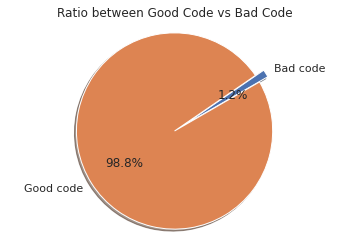

In [47]:
labels = 'Bad code', 'Good code'
sizes = [bad_code_df.shape[0], good_code_ids_df.shape[0]]
explode = (0.1, 0)

fig1, ax1 = plt.subplots())
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Ratio between Good Code vs Bad Code")
plt.show()

¡The dataset is unbalanced! But it makes sense, finding pairs of code snippets (bad code, good code) is hard. Let's remember that the BIFI approach consists of training a 'Breaker' with the Bad Code portion and then with this generate synthetic examples using the Good Code.

### MBPP Dataset

Based on https://github.com/google-research/google-research/tree/master/mbpp

TODO description

In [19]:
!wget https://raw.githubusercontent.com/google-research/google-research/master/mbpp/mbpp.jsonl

--2022-05-19 16:43:29--  https://raw.githubusercontent.com/google-research/google-research/master/mbpp/mbpp.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 563743 (551K) [text/plain]
Saving to: ‘mbpp.jsonl.1’

mbpp.jsonl.1        100%[===================>] 550.53K  1.03MB/s    in 0.5s    

2022-05-19 16:43:30 (1.03 MB/s) - ‘mbpp.jsonl.1’ saved [563743/563743]



In [20]:
mbpp_df = pd.read_json("mbpp.jsonl", orient='records', lines=True)
mbpp_df.head()

,text,code,task_id,test_setup_code,test_list,challenge_test_list
0,Write a function to find the minimum cost path...,"R = 3\r\nC = 3\r\ndef min_cost(cost, m, n): \r...",1,,"[assert min_cost([[1, 2, 3], [4, 8, 2], [1, 5,...",[]
1,Write a function to find the similar elements ...,"def similar_elements(test_tup1, test_tup2):\r\...",2,,"[assert similar_elements((3, 4, 5, 6),(5, 7, 4...",[]
2,Write a python function to identify non-prime ...,import math\r\ndef is_not_prime(n):\r\n res...,3,,"[assert is_not_prime(2) == False, assert is_no...",[]
3,Write a function to find the largest integers ...,import heapq as hq\r\ndef heap_queue_largest(n...,4,,"[assert heap_queue_largest( [25, 35, 22, 85, 1...",[]
4,Write a function to find the number of ways to...,def count_ways(n): \r\n\tA = [0] * (n + 1) \r\...,5,,"[assert count_ways(2) == 3, assert count_ways(...",[]


In [21]:
mbpp_df.isna().sum()

text                   0
code                   0
task_id                0
test_setup_code        0
test_list              0
challenge_test_list    0
dtype: int64

In [22]:
mbpp_df.dtypes

text                   object
code                   object
task_id                 int64
test_setup_code        object
test_list              object
challenge_test_list    object
dtype: object

In [23]:
mask = mbpp_df['challenge_test_list'].apply(lambda l: len(l)>0)

In [24]:
mbpp_df[mask]

,text,code,task_id,test_setup_code,test_list,challenge_test_list
10,Write a python function to remove first and la...,"def remove_Occ(s,ch): \r\n for i in range(l...",11,,"[assert remove_Occ(""hello"",""l"") == ""heo"", asse...","[assert remove_Occ(""hellolloll"",""l"") == ""helol..."
15,Write a function to find sequences of lowercas...,import re\r\ndef text_lowercase_underscore(tex...,16,,"[assert text_lowercase_underscore(""aab_cbbbc"")...","[assert text_lowercase_underscore(""aab-cbbbc"")..."
19,Write a function to check if the given number ...,def is_woodall(x): \r\n\tif (x % 2 == 0): \r\n...,20,,"[assert is_woodall(383) == True, assert is_woo...","[assert is_woodall(32212254719) == True, asser..."
22,Write a python function to find the maximum su...,def maximum_Sum(list1): \r\n maxi = -100000...,23,,"[assert maximum_Sum([[1,2,3],[4,5,6],[10,11,12...","[assert maximum_Sum([[0,-1,-1],[-1,-1,-2],[-3,..."
24,Write a python function to find the product of...,"def find_Product(arr,n): \r\n arr.sort() \r...",25,,"[assert find_Product([1,1,2,3],4) == 6, assert...","[assert find_Product([1,1,4,5,6,5,7,1,1,3,4],1..."
25,Write a function to check if the given tuple l...,"def check_k_elements(test_list, K):\r\n res =...",26,,"[assert check_k_elements([(4, 4), (4, 4, 4), (...","[assert check_k_elements([(4, 4), (4, 4, 4), (..."
27,Write a python function to find binomial co-ef...,"def binomial_Coeff(n,k): \r\n if k > n : \r...",28,,"[assert binomial_Coeff(5,2) == 10, assert bino...","[assert binomial_Coeff(14,6) == 3003]"
41,Write a python function to find the sum of rep...,"def find_Sum(arr,n): \r\n return sum([x for...",42,,"[assert find_Sum([1,2,3,1,1,4,5,6],8) == 3, as...","[assert find_Sum([1,1,2,3,4,5,6,3,5],9) == 18]"
42,Write a function to find sequences of lowercas...,import re\r\ndef text_match(text):\r\n patter...,43,,"[assert text_match(""aab_cbbbc"") == 'Found a ma...","[assert text_match(""aab-cbbbc"") == 'Not matche..."
43,Write a function that matches a word at the be...,import re\r\ndef text_match_string(text):\r\n ...,44,,"[assert text_match_string("" python"")==('Not ma...","[assert text_match_string(""foo"")==('Found a ma..."


In [25]:
#example problem
mbpp_df['text'][0:1][0]

'Write a function to find the minimum cost path to reach (m, n) from (0, 0) for the given cost matrix cost[][] and a position (m, n) in cost[][].'

In [26]:
#example solution
example_sol =  '\n'.join([mbpp_df['code'][0:1][0], '\n'.join(mbpp_df['test_list'][0:1][0])])

In [27]:
print(example_sol)

R = 3
C = 3
def min_cost(cost, m, n): 
	tc = [[0 for x in range(C)] for x in range(R)] 
	tc[0][0] = cost[0][0] 
	for i in range(1, m+1): 
		tc[i][0] = tc[i-1][0] + cost[i][0] 
	for j in range(1, n+1): 
		tc[0][j] = tc[0][j-1] + cost[0][j] 
	for i in range(1, m+1): 
		for j in range(1, n+1): 
			tc[i][j] = min(tc[i-1][j-1], tc[i-1][j], tc[i][j-1]) + cost[i][j] 
	return tc[m][n]
assert min_cost([[1, 2, 3], [4, 8, 2], [1, 5, 3]], 2, 2) == 8
assert min_cost([[2, 3, 4], [5, 9, 3], [2, 6, 4]], 2, 2) == 12
assert min_cost([[3, 4, 5], [6, 10, 4], [3, 7, 5]], 2, 2) == 16


In [28]:
exec(example_sol)

Now we are going to tokenize the code present in MBPP using the BIFI tokenizer tool

In [ ]:
# https://en.wikipedia.org/wiki/Levenshtein_distance
# https://pypi.org/project/editdistance/
!pip install editdistance 

     |████████████████████████████████| 286 kB 1.3 MB/s eta 0:00:01


In [123]:
sys.path.insert(0, 'bifi_utils')

from code_utils import tokenize_python_code

mbpp_code_toks_joined = []
mbpp_anonymize_dict = []

i = 0
for code in mbpp_df['code'].values:
    try:
        tokens, anonymize_dict = tokenize_python_code(code)
    except:
        print(f"Problem tokenizing at item: {i}")
    finally:
        mbpp_code_toks_joined.append(' '.join(tokens))
        mbpp_anonymize_dict.append(anonymize_dict)
    i = i + 1

mbpp_toks_df = pd.DataFrame({'code_toks_joined' : mbpp_code_toks_joined, 'anonymize_dict': mbpp_anonymize_dict})
mbpp_df = pd.concat([mbpp_df, mbpp_toks_df], axis=1)

('ERRORTOKEN', (3, 17))
Problem tokenizing at item: 103
('ERRORTOKEN', (3, 51))
Problem tokenizing at item: 254
('ERRORTOKEN', (4, 14))
Problem tokenizing at item: 592
('ERRORTOKEN', (3, 36))
Problem tokenizing at item: 731


In [124]:
mbpp_df.head()

,text,code,task_id,test_setup_code,test_list,challenge_test_list,code_toks_joined,anonymize_dict
0,Write a function to find the minimum cost path...,"R = 3\r\nC = 3\r\ndef min_cost(cost, m, n): \r...",1,,"[assert min_cost([[1, 2, 3], [4, 8, 2], [1, 5,...",[],R = 3 <NEWLINE> C = 3 <NEWLINE> def min_cost (...,{}
1,Write a function to find the similar elements ...,"def similar_elements(test_tup1, test_tup2):\r\...",2,,"[assert similar_elements((3, 4, 5, 6),(5, 7, 4...",[],"def similar_elements ( test_tup1 , test_tup2 )...",{}
2,Write a python function to identify non-prime ...,import math\r\ndef is_not_prime(n):\r\n res...,3,,"[assert is_not_prime(2) == False, assert is_no...",[],import math <NEWLINE> def is_not_prime ( n ) :...,{}
3,Write a function to find the largest integers ...,import heapq as hq\r\ndef heap_queue_largest(n...,4,,"[assert heap_queue_largest( [25, 35, 22, 85, 1...",[],import heapq as hq <NEWLINE> def heap_queue_la...,{}
4,Write a function to find the number of ways to...,def count_ways(n): \r\n\tA = [0] * (n + 1) \r\...,5,,"[assert count_ways(2) == 3, assert count_ways(...",[],def count_ways ( n ) : <NEWLINE> <INDENT> A = ...,{}


## Exploratory Data Analysis

Some preliminary data descriptive analysis, which consists of summarizing your data, and identifying general trends and patterns of your data, by performing some basic statistical analysis. You should use data visualization charts, techniques and tools. You will need to review the material regarding exploratory data analysis posted in the section Fundamentals of Data Analytics of the Moodle course, specially:

- Chapter 15 Exploratory Data Analysis Matthieu Komorowski, Dominic C. Marshall, Justin D. Salciccioli and Yves Crutain 
- Chapter 4. Exploratory Data Analysis. Howard J. Seltman. CMU. 
- Towards data science: A Basic Guide to Initial and Exploratory Data Analysis With a few examples in Python.
- https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools


### BIFI Dataset

In [29]:
bad_code_df['code_string'][0:1].str.split()[0]


['def',
 'test_delitem_keyerror(self):',
 'e',
 '=',
 'EntryBase(req_()',
 'del',
 "e['missing_key']"]

In [30]:
bad_code_df['code_toks_joined'][0:1].str.split()[0]


['def',
 'test_delitem_keyerror',
 '(',
 'self',
 ')',
 ':',
 '<NEWLINE>',
 '<INDENT>',
 'e',
 '=',
 'EntryBase',
 '(',
 'req_',
 '(',
 ')',
 '<NEWLINE>',
 'del',
 'e',
 '[',
 '<STRING>',
 ']',
 '<NEWLINE>',
 '<DEDENT>']

It is more interesting for us the column 'code_token_joined'

In [55]:
# function to see code snippets lenght distribution

def len_dist(df, n, filter=True):
    '''
    df: column with code
    '''
    lens = df.str.split().apply(lambda x: len(x))
    print(lens.describe())
    plt.figure(figsize=(17,12))
    plt.subplot(2, 2, 1)
    ax = sns.histplot(data=lens)
    ax.set_title(f"Number of tokens all samples")
    ax.set_xlabel('Number of Tokens')

    plt.subplot(2, 2, 2)
    ax = sns.boxplot(x=lens)
    ax.set_title(f"Number of tokens all samples")
    ax.set_xlabel('Number of Tokens')

    filtered_lens = []
    if (filter): 
        #filter
        filtered_lens = lens[lens < lens.mean() + n*lens.std()]
        filtered_percent = round(100*filtered_lens.shape[0]/lens.shape[0])

        plt.subplot(2, 2, 3)
        ax = sns.histplot(data=filtered_lens)
        ax.set_title(f"Number of tokens {filtered_percent}% samples")
        ax.set_xlabel('Number of Tokens')
        #filtered_lens.hist()

        plt.subplot(2, 2, 4)
        ax = sns.boxplot(x=filtered_lens)
        ax.set_title(f"Number of tokens {filtered_percent}% samples")
        ax.set_xlabel('Number of Tokens')
    return lens, filtered_lens

Bad Code, Number of Tokens distribution
count    37639.000000
mean        90.815803
std        143.893521
min         10.000000
25%         55.000000
50%         77.000000
75%         98.000000
max       7630.000000
Name: code_toks_joined, dtype: float64


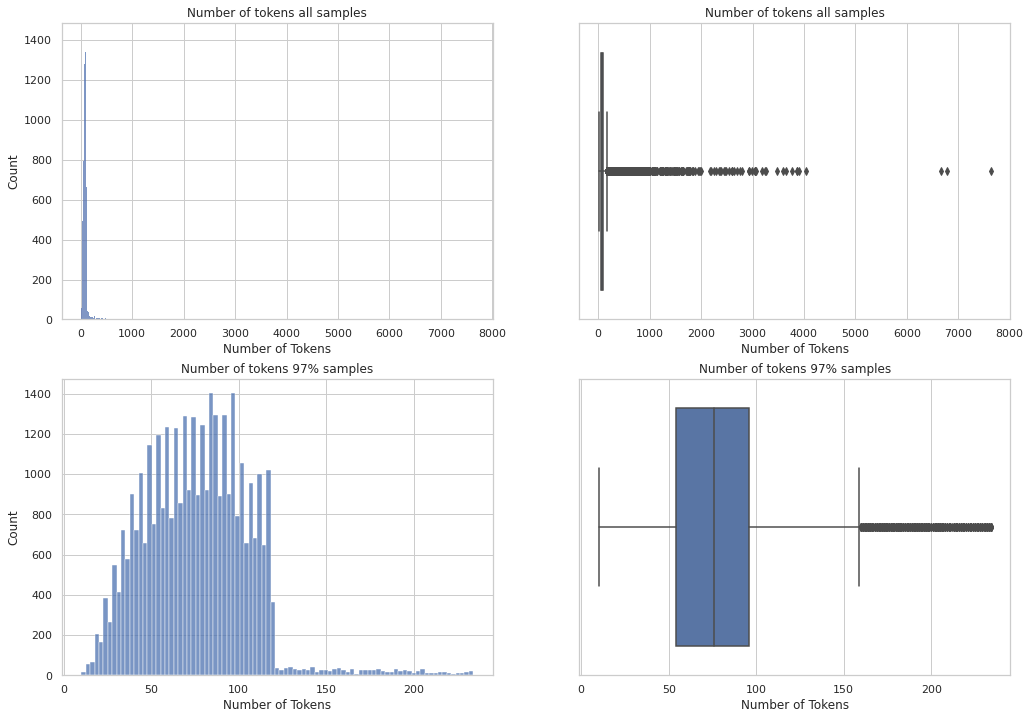

In [56]:
print("Bad Code, Number of Tokens distribution")
_, _ = len_dist(bad_code_df['code_toks_joined'],1)

In [33]:
err_obj_msg_df = bad_code_df['err_obj'].apply(lambda dic: dic['msg'])

/tmp/ipykernel_428/1785219308.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(err_obj_msg_df.unique(), rotation=45, horizontalalignment='right')


Text(0.5, 0, 'Messages')

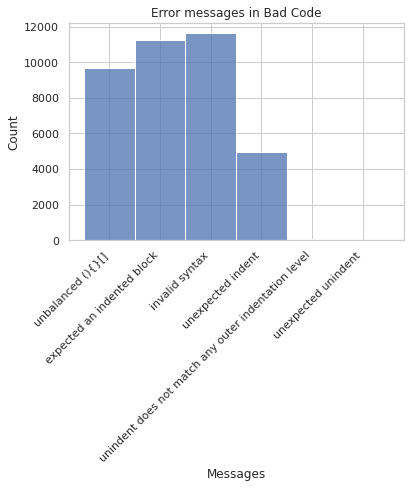

In [57]:
ax = sns.histplot(data=err_obj_msg_df)
ax.set_xticklabels(err_obj_msg_df.unique(), rotation=45, horizontalalignment='right')
ax.set_title("Error messages in Bad Code")
ax.set_xlabel("Messages")


In [35]:
def count_samples(err_msg):
    c = err_obj_msg_df[err_obj_msg_df == err_msg].count()
    print(f"Number of samples msg error '{err_msg}': {c}")

In [36]:
count_samples('unindent does not match any outer indentation level')
count_samples('unexpected unindent')

Number of samples msg error 'unindent does not match any outer indentation level': 70
Number of samples msg error 'unexpected unindent': 16


As we can see there are some type of errors with very low frequency

Good Code, Number of Tokens distribution
count    298408.000000
mean         57.280706
std          29.086039
min           5.000000
25%          33.000000
50%          53.000000
75%          79.000000
max         120.000000
Name: code_toks_joined, dtype: float64


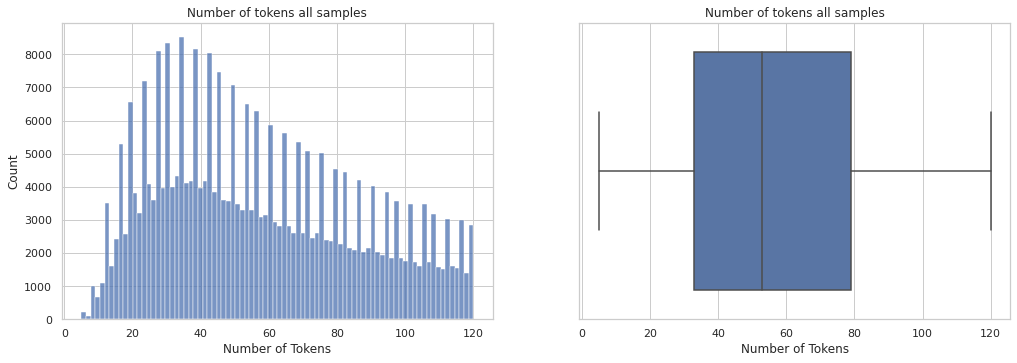

In [58]:
print("Good Code, Number of Tokens distribution")
_, _ = len_dist(good_code_df['code_toks_joined'],1, filter=False)

In [38]:
# All the chunks are equally distributed
# for i in range(1,10):
#    _, _ = len_dist(load_good_code_chunk(chunk_id=1)['code_toks_joined'],1, filter=False)

In [68]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alejandro56664/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

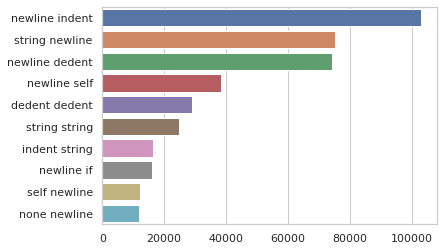

In [72]:
plot_top_ngrams_barchart(bad_code_df['code_toks_joined'])

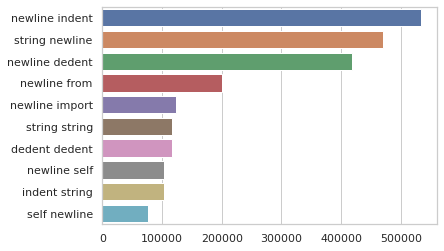

In [73]:
plot_top_ngrams_barchart(good_code_df['code_toks_joined'])

### MBPP Dataset

TODO

Text(0.5, 0, 'Number of characters per word')

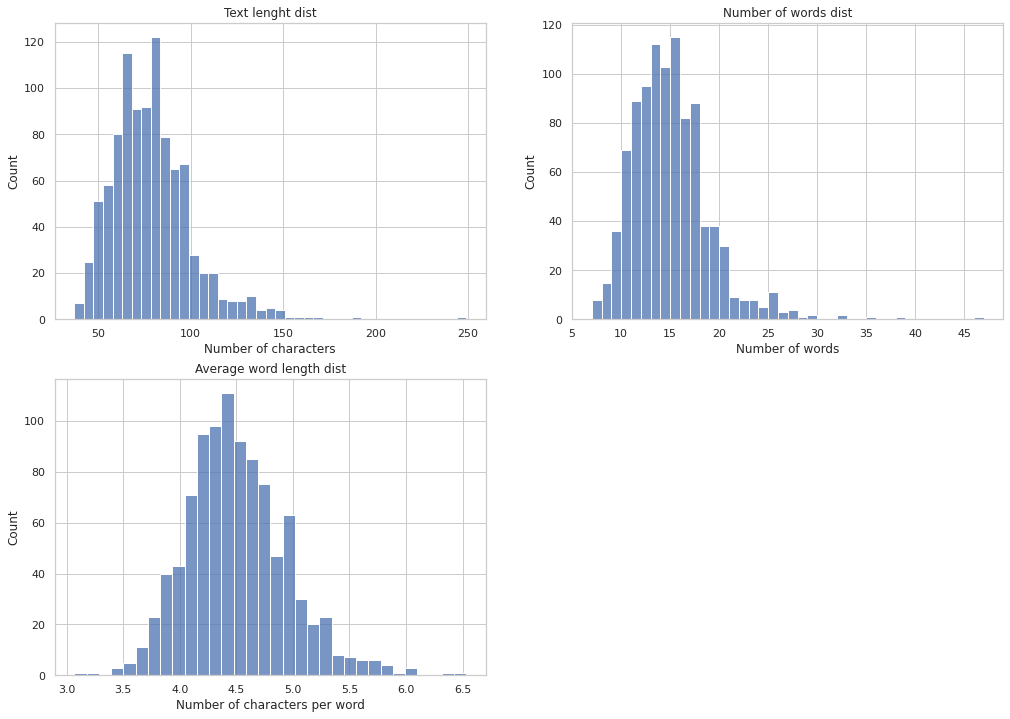

In [44]:
plt.figure(figsize=(17,12))
plt.subplot(2, 2, 1)
# length distribution of problem statement
ax = sns.histplot(data=mbpp_df['text'].str.len())
ax.set_title('Text lenght dist')
ax.set_xlabel('Number of characters')

plt.subplot(2, 2, 2)
# number of words
ax = sns.histplot(data=mbpp_df['text'].str.split().map(lambda x: len(x)))
ax.set_title('Number of words dist')
ax.set_xlabel('Number of words')

plt.subplot(2, 2, 3)
# average word length
ax = sns.histplot(data=mbpp_df['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)))
ax.set_title('Average word length dist')
ax.set_xlabel('Number of characters per word')

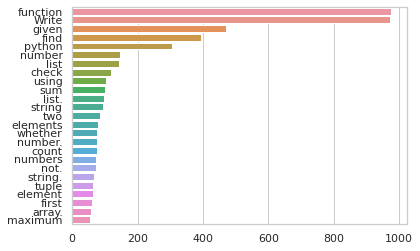

In [165]:
plot_top_non_stopwords_barchart(mbpp_df['text'])

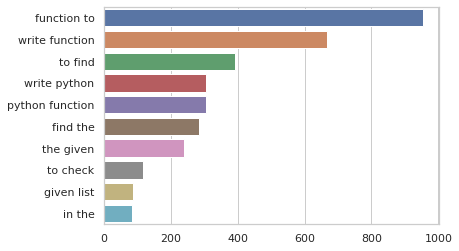

In [168]:
plot_top_ngrams_barchart(mbpp_df['text'], n=2)

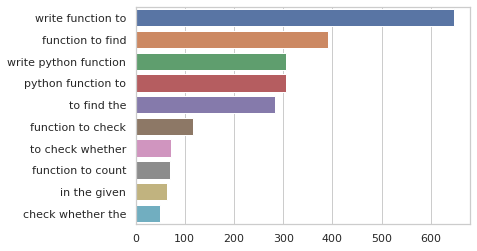

In [169]:
plot_top_ngrams_barchart(mbpp_df['text'], n=3)

In [173]:
!pip install wordcloud #runing in colab


     |████████████████████████████████| 371 kB 459 kB/s eta 0:00:01


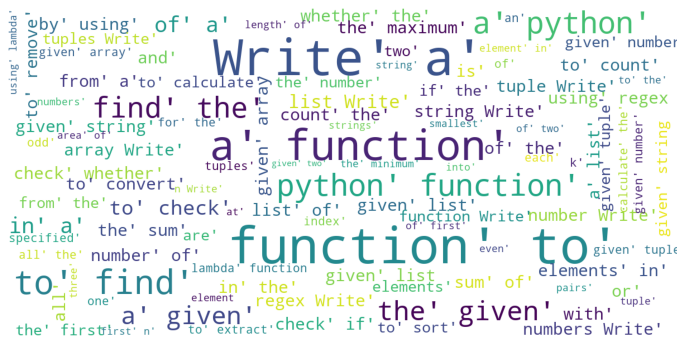

In [174]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

Solution Code, Number of Tokens distribution
count    974.000000
mean      60.755647
std       43.178635
min       15.000000
25%       32.000000
50%       46.000000
75%       73.000000
max      324.000000
Name: code_toks_joined, dtype: float64


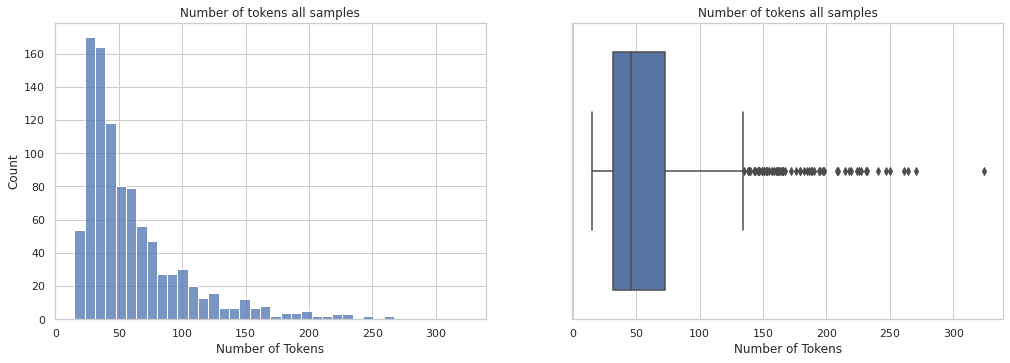

In [125]:
print("Solution Code, Number of Tokens distribution")
_, _ = len_dist(mbpp_df['code_toks_joined'],1, filter=False)

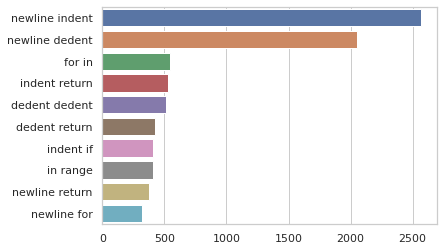

In [126]:
plot_top_ngrams_barchart(mbpp_df['code_toks_joined'])

In [ ]:
# si alcanza el tiempo https://github.com/JetBrains-Research/astminer

## Conclusions

TODO